In [125]:
#IRIS dataset
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()
dir(iris)
# iris.feature_names
# iris.target_names

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [126]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target 
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [127]:
from matplotlib import pyplot as plt 

In [128]:
df0= df[df['target']==0]
df1= df[df['target']==1]
df2= df[df['target']==2]

Text(0, 0.5, 'Sepal width (cm)')

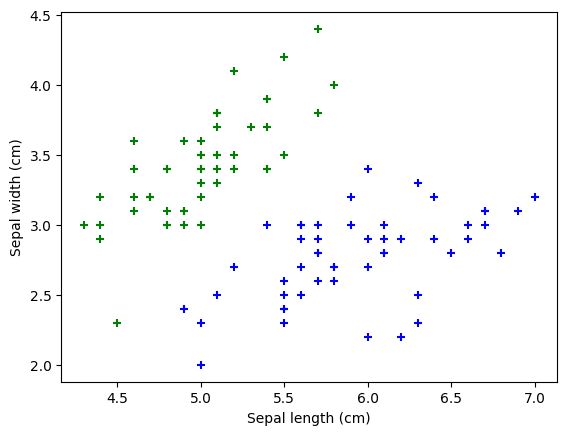

In [129]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color = 'blue', marker = '+')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')


Text(0, 0.5, 'Petal width (cm)')

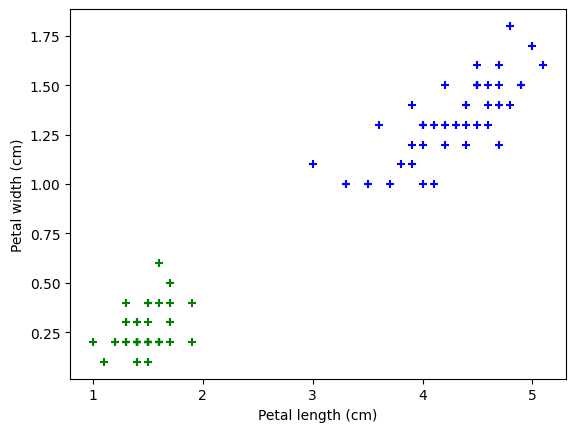

In [130]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color = 'blue', marker = '+')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X= df.drop(['target','flower_name'],axis='columns')
y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)


In [133]:
#SUPPORT VECTOR MACHINE model variation (SVM)
from sklearn.svm import SVC
model = SVC()
model.fit (X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [134]:
#KNN Classifier model variation 
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

Text(45.722222222222214, 0.5, 'True')

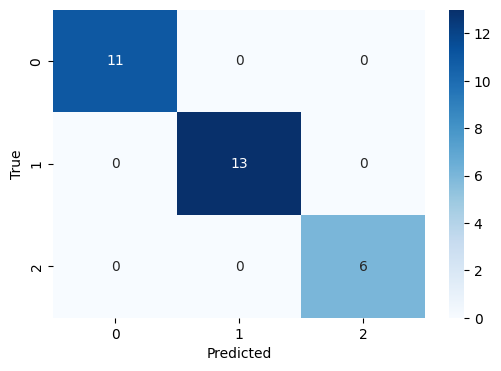

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [137]:
#DIGITS dataset
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [138]:
dfd= pd.DataFrame(digits.data,index=digits.target)
dfd['target'] = digits.target
dfd.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfd.drop(['target'],axis='columns'), dfd['target'], test_size=0.3, random_state=10)

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9907407407407407

In [140]:
#SUPPORT VECTOR MACHINE model variation (SVM)
from sklearn.svm import SVC
model = SVC()
model.fit (X_train, y_train)
model.score(X_test, y_test)

0.9833333333333333

Text(45.722222222222214, 0.5, 'Truth')

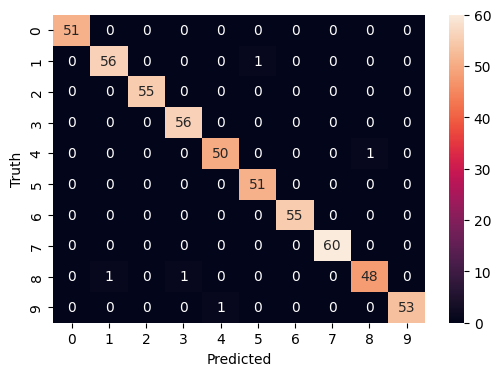

In [141]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        57
           2       1.00      1.00      1.00        55
           3       0.98      1.00      0.99        56
           4       0.98      0.98      0.98        51
           5       0.98      1.00      0.99        51
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        60
           8       0.98      0.96      0.97        50
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

